#### Organizational

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats
from matplotlib.pyplot import xscale, ylim
import random
from matplotlib.pyplot import figure

In [12]:
salaries = pd.read_csv("salaries.csv")

In [13]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [15]:
salaries.sort_values(by = 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
373,2022,EN,FT,3D Computer Vision Researcher,2324,USD,2324,AX,0,AL,L
466,2022,SE,FT,Data Scientist,12500,BRL,2429,BR,100,BR,L
1106,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S
549,2022,EN,FT,AI Scientist,240000,INR,3088,IN,0,IN,S
1168,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
1187,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
956,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
1013,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L


#### Looking at Value Counts 

In [27]:

#for loop for the value counts of columns 
v = []
for x in salaries:
    v.append(salaries[x].value_counts())


n = []
for x in salaries:
    n.append(salaries[x].nunique())
    
v


[2022    893
 2021    227
 2020     75
 Name: work_year, dtype: int64,
 SE    702
 MI    314
 EN    138
 EX     41
 Name: experience_level, dtype: int64,
 FT    1170
 PT      12
 CT       8
 FL       5
 Name: employment_type, dtype: int64,
 Data Scientist               310
 Data Engineer                276
 Data Analyst                 162
 Machine Learning Engineer     78
 Analytics Engineer            37
                             ... 
 Power BI Developer             1
 Data Science Lead              1
 Big Data Architect             1
 Staff Data Scientist           1
 Finance Data Analyst           1
 Name: job_title, Length: 63, dtype: int64,
 100000    30
 80000     28
 200000    26
 50000     25
 150000    24
           ..
 86000      1
 22800      1
 62500      1
 105400     1
 151000     1
 Name: salary, Length: 405, dtype: int64,
 USD    892
 EUR    129
 GBP     76
 INR     40
 CAD     21
 AUD      8
 BRL      5
 PLN      3
 TRY      3
 JPY      3
 SGD      3
 DKK      3
 C

In [28]:
salaries.job_title.value_counts().head(60)

Data Scientist                              310
Data Engineer                               276
Data Analyst                                162
Machine Learning Engineer                    78
Analytics Engineer                           37
Data Architect                               33
Data Science Manager                         29
Research Scientist                           20
Machine Learning Scientist                   15
ML Engineer                                  14
AI Scientist                                 12
BI Data Analyst                              12
ETL Developer                                10
Big Data Engineer                             9
Applied Machine Learning Scientist            9
Data Science Consultant                       9
Director of Data Science                      8
Business Data Analyst                         8
Principal Data Scientist                      7
Data Analytics Manager                        7
Data Operations Engineer                

In [29]:


b = ['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']
#for x in b:
    salaries[x].value_counts().plot(kind= 'bar')
    plt.figure(figsize = (10,3))
    plt.title(x)
    plt.show()

IndentationError: unexpected indent (Temp/ipykernel_22600/972324777.py, line 4)

In [30]:
salaries[salaries.job_title=='3D Computer Vision Researcher']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
373,2022,EN,FT,3D Computer Vision Researcher,2324,USD,2324,AX,0,AL,L
971,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M


#### Below is salary range vs quantity

In [31]:
count = salaries.groupby(by = 'job_title').count()['salary_in_usd']

In [32]:
avg = salaries.groupby(by = 'work_year').count()['salary_in_usd']
avg.sort_values()

work_year
2020     75
2021    227
2022    893
Name: salary_in_usd, dtype: int64

In [33]:
range = salaries.groupby(by = 'job_title').max()['salary_in_usd']-salaries.groupby(by = 'job_title').min()['salary_in_usd']

In [34]:
us= salaries[salaries.company_location == 'US']
ca= salaries[salaries.company_location == 'CA']
ru= salaries[salaries.company_location == 'RU']

In [35]:
ca.experience_level.value_counts()

SE    20
MI    10
EN     4
EX     3
Name: experience_level, dtype: int64

In [36]:
us.groupby(by = 'experience_level').mean()['salary_in_usd']

experience_level
EN     92418.367347
EX    225209.482759
MI    122746.843972
SE    152856.071192
Name: salary_in_usd, dtype: float64

In [37]:
range = pd.DataFrame(range)
count = pd.DataFrame(count)
avg = pd.DataFrame(avg)
avg

,salary_in_usd
work_year,
2020,75
2021,227
2022,893


In [38]:
range = range.merge(count, on = 'job_title' )


In [39]:
range = range.merge(avg, on = 'job_title')

KeyError: 'job_title'

In [40]:
range

,salary_in_usd_x,salary_in_usd_y
job_title,,
3D Computer Vision Researcher,3085,2
AI Scientist,196912,12
Analytics Engineer,242500,37
Applied Data Scientist,330000,6
Applied Machine Learning Scientist,392359,9
...,...,...
Principal Data Scientist,267739,7
Product Data Analyst,133928,3
Product Data Scientist,0,1


In [41]:
#removing all jobs that only are listed once, they have a range of 0
more = range.sort_values(by = 'salary_in_usd_x').tail(50)
more =more.reset_index()
more.head()

,job_title,salary_in_usd_x,salary_in_usd_y
0,3D Computer Vision Researcher,3085,2
1,Machine Learning Research Engineer,7829,2
2,Data Operations Analyst,15000,2
3,Lead Machine Learning Engineer,26786,3
4,Data Manager,36000,5


In [42]:
plt.figure(figsize = (10,8))
plt.scatter(more.salary_in_usd_x,more.salary_in_usd)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Range of Salary (Dollars)")
plt.ylabel("Average Salary (Dollars)")
plt.title('Range of Salarye vs. Average Salary',fontdict = {'fontsize' : 20})


AttributeError: 'DataFrame' object has no attribute 'salary_in_usd'

<Figure size 720x576 with 0 Axes>

#### Salary Breakdown by Experience Level

In [43]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [44]:
salaries.employment_type.value_counts()

FT    1170
PT      12
CT       8
FL       5
Name: employment_type, dtype: int64

In [45]:
EN = salaries[salaries.experience_level == 'EN']
MI = salaries[salaries.experience_level == 'MI']
SE = salaries[salaries.experience_level == 'SE']
EX = salaries[salaries.experience_level == 'EX']


(array([ 8., 11., 11.,  6.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 69741. , 122766.9, 175792.8, 228818.7, 281844.6, 334870.5,
        387896.4, 440922.3, 493948.2, 546974.1, 600000. ]),
 <BarContainer object of 10 artists>)

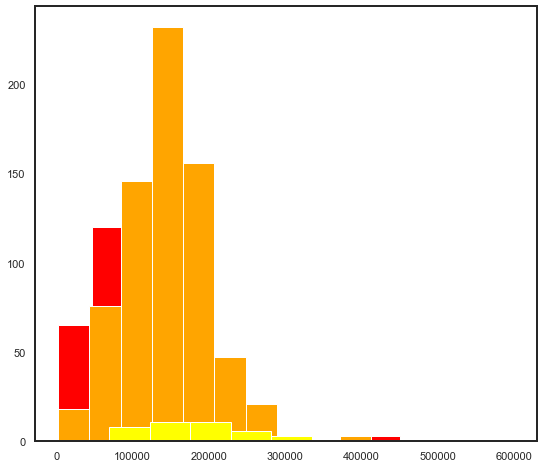

In [46]:
plt.hist(EN.salary_in_usd,label = "Entry Level")
plt.hist(MI.salary_in_usd)
plt.hist(SE.salary_in_usd)
plt.hist(EX.salary_in_usd)


C:\Users\charl\AppData\Local\Temp/ipykernel_22600/837668452.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(-100000.0, 0, '-100,000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000'),
 Text(600000.0, 0, '600,000'),
 Text(700000.0, 0, '700,000')]

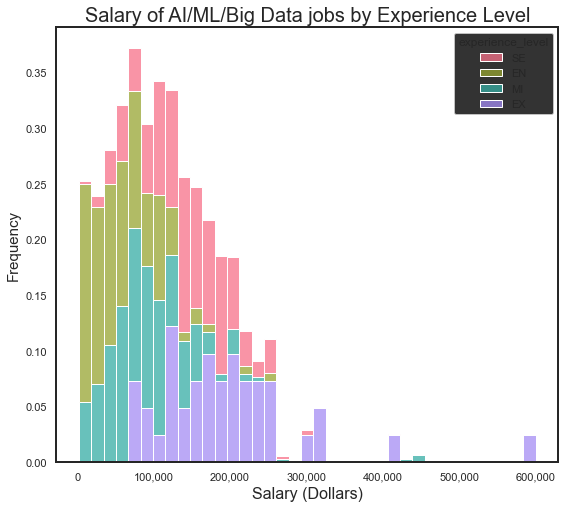

In [47]:
flatui = ["#9b59b6", "#3498db", "orange",]
sns.set_palette(flatui)


plt.plot()
plt.xlabel("Salary (Dollars)",fontdict = {'fontsize' : 16})
plt.ylabel("Frequency",fontdict = {'fontsize' : 15})
plt.title('Salary of AI/ML/Big Data jobs by Experience Level',fontdict = {'fontsize' : 20})


sns.histplot(
    data = salaries, x = "salary_in_usd", hue= "experience_level", multiple = "stack",
    stat = "proportion", common_norm = False,
    #hue_order=['EN', 'MI', 'SE', 'EX'],
    #legend = False
    )




#plt.legend(title = 'Experience Level', labels = ['Entry Level','Mid Level', 'Senior Level','Executive Level'])


sns.set(rc = {"figure.figsize":(9,8)})
sns.set_style("white")
sns.set_style("ticks")


current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])



In [48]:
salariess = salaries
salariess['experience_level'] = salariess['experience_level'].replace(['EN','MI',"SE","EX"],['Entry Level','Middle Level','Senior Level','Executive Level'])

NameError: name 'label' is not defined

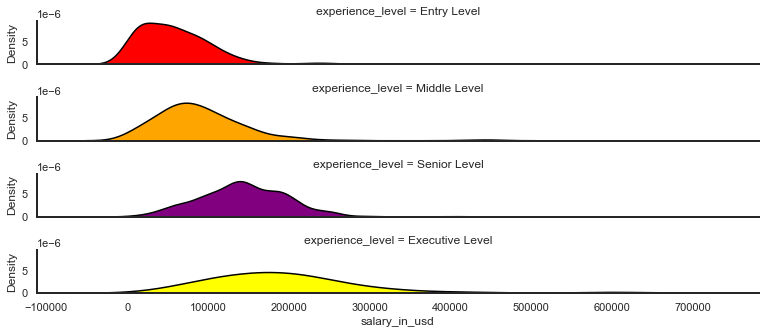

In [50]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
flatui = ["purple","red", "orange", "yellow"]
sns.set_palette(flatui)

g = sns.FacetGrid(salariess, row = "experience_level",  hue = "experience_level", row_order=['Entry Level','Middle Level','Senior Level','Executive Level'],
height = 1.2,aspect= 9)
g.map_dataframe(
    sns.kdeplot, x= "salary_in_usd", fill = True,alpha = 1,

    )
g.map_dataframe(
    sns.kdeplot, x= "salary_in_usd", 
    color = 'black',
    )

g.map(label, "experience_level")
g.fig.subplots_adjust(hspace=-.5)

xxx = np.arange(0,600001,100000)



g.set_titles("")
g.despine (left = True,bottom = False)
g.set(yticks = [])
g.set(xlabel = "Salary (USD)")
g.set(xticks = xxx)
plt.suptitle("Salary of AI/ML/Big Data jobs by Experience Level", y = 1.1,fontsize = 20)
g.set_ylabels("")

plt.xticks(fontsize = 14)
g.set_xlabels(label = "Salary (USD)", fontsize= 15)



current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#### By Job Size

In [51]:
salariess
salariess['company_size'] = salariess['company_size'].replace(['S','M',"L"],['Small','Medium','Large'])


In [52]:
salariess = salariess.rename({'company_size':'Company Size'}, axis = 1)

In [53]:
salariess

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,Company Size
0,2022,Senior Level,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,Small
1,2022,Entry Level,FT,Data Scientist,96000,CAD,74378,CA,100,CA,Large
2,2022,Senior Level,FT,Data Science Lead,165000,USD,165000,US,50,US,Small
3,2022,Entry Level,FT,Data Scientist,27000,GBP,33599,GB,50,GB,Large
4,2022,Senior Level,FT,Data Engineer,185900,USD,185900,US,0,US,Medium
...,...,...,...,...,...,...,...,...,...,...,...
1190,2020,Senior Level,FT,Data Scientist,412000,USD,412000,US,100,US,Large
1191,2021,Middle Level,FT,Principal Data Scientist,151000,USD,151000,US,100,US,Large
1192,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,100,US,Small
1193,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,Large


C:\Users\charl\AppData\Local\Temp/ipykernel_22600/471893453.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(-100000.0, 0, '-100,000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000'),
 Text(600000.0, 0, '600,000'),
 Text(700000.0, 0, '700,000')]

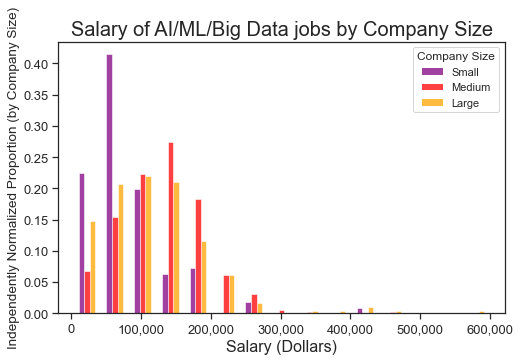

In [54]:
sns.set(rc = {"figure.figsize":(8,5)})
sns.set_style("white")
sns.set_style("ticks")
flatui = ["purple","red", "orange", "yellow"]

sns.set_palette(flatui)
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})


plt.plot()
plt.xlabel("Salary (Dollars)",fontdict = {'fontsize' : 16})
plt.ylabel("Independently Normalized Proportion (by Company Size)",fontdict = {'fontsize' : 13.5})
plt.title('Salary of AI/ML/Big Data jobs by Company Size',fontdict = {'fontsize' : 20})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)



sns.histplot(
    data = salariess, x = "salary_in_usd", hue= "Company Size", multiple= "dodge", bins = 15,
    stat = "proportion", common_norm = False, shrink = .6,
    hue_order=['Small','Medium','Large']

    )


#plt.legend(title = 'Company Size',labels = ['Small','Medium','Large'])






current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])



In [55]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
flatui = ["purple","red", "orange", "yellow"]
sns.set_palette(flatui)

g = sns.FacetGrid(salariess, row = "company_size",  hue = "company_size", row_order=['Small','Medium','Large'],
height = 1.2,aspect= 9)
g.map_dataframe(
    sns.kdeplot, x= "salary_in_usd", fill = True,alpha = 1,

    )
g.map_dataframe(
    sns.kdeplot, x= "salary_in_usd", 
    color = 'black',
    )

g.map(label, "company_size")
g.fig.subplots_adjust(hspace=-.5)

xxx = np.arange(0,600001,100000)

g.set_titles("")
g.despine (left = True)
g.set(yticks = [],xlabel = "Salary (USD)",xticks =xxx)
plt.suptitle("Salary of AI/ML/Big Data jobs by Company Size", y = 1.1,fontsize = 20)
g.set_ylabels("")

plt.xticks(fontsize = 14)
g.set_xlabels(label = "Salary (USD)", fontsize= 15)



current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

KeyError: 'company_size'

#### Salary by company location 

In [56]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Senior Level,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,Small
1,2022,Entry Level,FT,Data Scientist,96000,CAD,74378,CA,100,CA,Large
2,2022,Senior Level,FT,Data Science Lead,165000,USD,165000,US,50,US,Small
3,2022,Entry Level,FT,Data Scientist,27000,GBP,33599,GB,50,GB,Large
4,2022,Senior Level,FT,Data Engineer,185900,USD,185900,US,0,US,Medium


In [57]:
salaries[salaries.company_location=='RU']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
952,2021,Executive Level,FT,Head of Data Science,85000,USD,85000,RU,0,RU,Medium
953,2021,Executive Level,FT,Head of Data,230000,USD,230000,RU,50,RU,Large


In [58]:
loc = salaries.groupby(by = 'company_location').mean()['salary_in_usd']
loc = pd.DataFrame(loc)
loc = loc.reset_index()
loc.head()

,company_location,salary_in_usd
0,AE,100000.0
1,AL,2324.0
2,AR,50000.0
3,AS,34026.5
4,AT,67834.4


In [59]:
codes = pd.read_csv("wikipedia-iso-country-codes.csv")
codes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [60]:
complete = pd.merge(loc,codes, how = 'left', left_on = 'company_location', right_on = 'Alpha-2 code')
complete.head()


,company_location,salary_in_usd,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,AE,100000.0,United Arab Emirates,AE,ARE,784,ISO 3166-2:AE
1,AL,2324.0,Albania,AL,ALB,8,ISO 3166-2:AL
2,AR,50000.0,Argentina,AR,ARG,32,ISO 3166-2:AR
3,AS,34026.5,American Samoa,AS,ASM,16,ISO 3166-2:AS
4,AT,67834.4,Austria,AT,AUT,40,ISO 3166-2:AT


In [61]:
from turtle import color
import plotly.express as px

fig = px.choropleth(complete,
                    locations='Alpha-3 code', 
                    locationmode="ISO-3", 
                    scope="world",
                    color_continuous_scale=px.colors.sequential.Inferno,
                    color= loc.salary_in_usd
                     
                    )

fig.update_layout(
      title_text = 'Average Salary by Company Location',
      #title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.47,
      coloraxis_colorbar = dict(title = "Average Salary",title_font_size = 18),
      height = 600, 
      width = 1000,
      
        ) 
         
fig.show()

#### Fourth Visualization (option a): salary by employee residence

In [62]:
salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Senior Level,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,Small
1,2022,Entry Level,FT,Data Scientist,96000,CAD,74378,CA,100,CA,Large
2,2022,Senior Level,FT,Data Science Lead,165000,USD,165000,US,50,US,Small
3,2022,Entry Level,FT,Data Scientist,27000,GBP,33599,GB,50,GB,Large
4,2022,Senior Level,FT,Data Engineer,185900,USD,185900,US,0,US,Medium


In [63]:
salaries.work_year.value_counts()

2022    893
2021    227
2020     75
Name: work_year, dtype: int64

In [64]:
salaries.sort_values(by = 'salary_in_usd', ascending = False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1141,2021,Executive Level,FT,Principal Data Engineer,600000,USD,600000,US,100,US,Large
956,2020,Middle Level,FT,Research Scientist,450000,USD,450000,US,0,US,Medium
1013,2021,Middle Level,FT,Financial Data Analyst,450000,USD,450000,US,100,US,Large
1187,2021,Middle Level,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,Large
1112,2021,Executive Level,CT,Principal Data Scientist,416000,USD,416000,US,100,US,Small
...,...,...,...,...,...,...,...,...,...,...,...
1168,2021,Entry Level,FT,Data Scientist,4000,USD,4000,VN,0,VN,Medium
549,2022,Entry Level,FT,AI Scientist,240000,INR,3088,IN,0,IN,Small
1106,2021,Middle Level,FT,Data Scientist,58000,MXN,2859,MX,0,MX,Small
466,2022,Senior Level,FT,Data Scientist,12500,BRL,2429,BR,100,BR,Large


In [65]:
res = salaries.groupby(by = 'employee_residence').mean()['salary_in_usd']
res = pd.DataFrame(res)
res = res.reset_index()
res.head()

,employee_residence,salary_in_usd
0,AE,100000.000000
1,AR,52666.666667
2,AT,69426.250000
3,AU,83785.555556
4,AX,2324.000000


In [66]:
complete = pd.merge(res,codes, how = 'left', left_on = 'employee_residence', right_on = 'Alpha-2 code')
complete.head()

,employee_residence,salary_in_usd,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,AE,100000.000000,United Arab Emirates,AE,ARE,784,ISO 3166-2:AE
1,AR,52666.666667,Argentina,AR,ARG,32,ISO 3166-2:AR
2,AT,69426.250000,Austria,AT,AUT,40,ISO 3166-2:AT
3,AU,83785.555556,Australia,AU,AUS,36,ISO 3166-2:AU
4,AX,2324.000000,Åland Islands,AX,ALA,248,ISO 3166-2:AX


In [67]:
from turtle import color
import plotly.express as px

fig = px.choropleth(complete,
                    locations='Alpha-3 code', 
                    locationmode="ISO-3", 
                    scope="world",
                    color_continuous_scale=px.colors.sequential.Inferno,
                    color= res.salary_in_usd
                     
                    )

fig.update_layout(
      title_text = 'Average Salary by Company Location',
      #title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.47,
      coloraxis_colorbar = dict(title = "Average Salary",title_font_size = 18),
      height = 600, 
      width = 1000,
      
        ) 
         
fig.show()

#### Fourth Visualization (option a): salary by employee residence

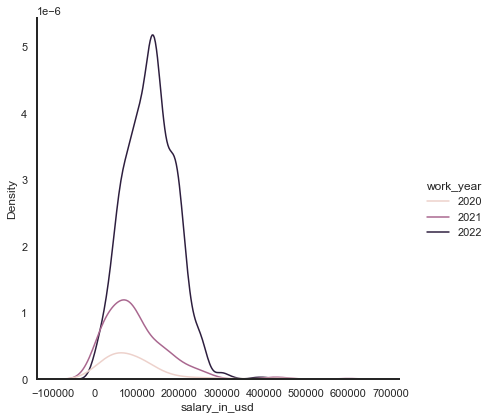

In [68]:
sns.displot(
    data= salaries,
    x = "salary_in_usd",  hue = "work_year",
    kind = "kde",
    #multiple = "stack",
    height = 6
   

)

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

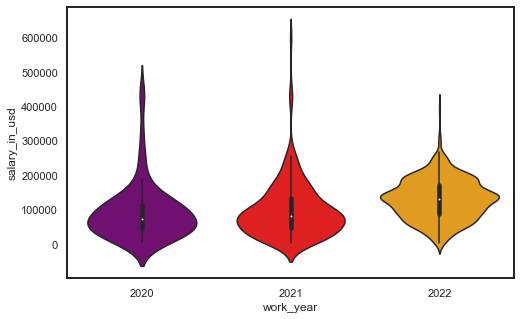

In [69]:
sns.violinplot(
    data = salaries, x = "work_year", y = "salary_in_usd",
    # hue = "remote_ratio",
)

C:\Users\charl\AppData\Local\Temp/ipykernel_22600/1270611237.py:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



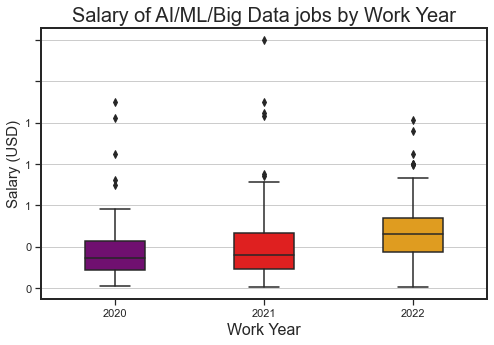

In [85]:

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


sns.set_style("ticks", {'axis.grid': True})
plt.grid(axis = 'both')
sns.set_palette(flatui)

ok = sns.boxplot(
    data = salaries, x = 'work_year', y = "salary_in_usd",
    width = .4,

    )

plt.plot()
plt.xlabel("Work Year",fontdict = {'fontsize' : 16})
plt.ylabel("Salary (USD)",fontdict = {'fontsize' : 15})
plt.title('Salary of AI/ML/Big Data jobs by Work Year',fontdict = {'fontsize' : 20})

#ok.set_xticklabels(ok.get_xticks(),size =10)
#ok.set_yticklabels(ok.get_yticks(),size =15)

plt.show()
#plt.grid()
